In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
DATA_DIR = "../data/"

In [3]:
def load_proton_a_images(n=None):
    data_a = pd.read_pickle(os.path.join(DATA_DIR, "proton_images2a.pkl"))
    data_b = pd.read_pickle(os.path.join(DATA_DIR, "proton_images2b.pkl"))
    data_c = pd.read_pickle(os.path.join(DATA_DIR, "proton_images2c.pkl"))
    return np.r_[data_a, data_b, data_c][:n]

def load_neutron_a_images(n=None):
    data_a = pd.read_pickle(os.path.join(DATA_DIR, "neutron_images2a.pkl"))
    data_b = pd.read_pickle(os.path.join(DATA_DIR, "neutron_images2b.pkl"))
    data_c = pd.read_pickle(os.path.join(DATA_DIR, "neutron_images2c.pkl"))
    return np.r_[data_a, data_b, data_c][:n]

def load_particle_data_a(n=None):
    data_a = pd.read_pickle(os.path.join(DATA_DIR, "particles_cond_with_mass2a.pkl"))
    data_b = pd.read_pickle(os.path.join(DATA_DIR, "particles_cond_with_mass2b.pkl"))
    data_c = pd.read_pickle(os.path.join(DATA_DIR, "particles_cond_with_mass2c.pkl"))
    return pd.concat([data_a, data_b, data_c], axis=0)[:n]

In [4]:
N_SAMPLES_T0_LOAD = None

data_p = load_proton_a_images(N_SAMPLES_T0_LOAD)
print('Loaded Proton: ',  data_p.shape)

data_n = load_neutron_a_images(N_SAMPLES_T0_LOAD)
print('Loaded Neutron: ',  data_n.shape)

data_cond = load_particle_data_a(N_SAMPLES_T0_LOAD)
print('Loaded cond: ',  data_cond.shape)

Loaded Proton:  (511810, 56, 30)
Loaded Neutron:  (511810, 44, 44)
Loaded cond:  (511810, 11)


In [37]:
def get_sparsity_data(data_proton, data_neutrod):
    print(data_proton.min(), data_proton.max())
    print(data_neutrod.min(), data_neutrod.max())
    zero_pixels_p = np.sum(data_proton == 0)
    zero_pixels_n = np.sum(data_neutrod == 0)
    print("n of 0 pixel: ", zero_pixels_p)
    print("n of 0 pixel: ", zero_pixels_n)
    total_pixels_p = np.prod(data_proton.shape)
    total_pixels_n = np.prod(data_neutrod.shape)
    print("n of 0 pixel: {:.4f}".format(zero_pixels_p/total_pixels_p))
    print("n of 0 pixel: {:.4f}".format(zero_pixels_n/total_pixels_n))

In [22]:
get_sparsity_data(data_p, data_n)

0.0 765.0
0.0 591.0
n of 0 pixel:  850294962
n of 0 pixel:  952191775
n of 0 pixel: 0.9889
n of 0 pixel: 0.9610


In [6]:
data_p = np.log(data_p+1)
data_n = np.log(data_n+1)
print(data_p.min(), data_p.max())
print(data_n.min(), data_n.max())

0.0 6.641182169740591
0.0 6.3835066348840055


In [5]:
data_cond.rename(columns={'PhotonSum': 'neutron_photon_sum'}, inplace=True)

In [6]:
data_cond.neutron_photon_sum = data_cond.neutron_photon_sum.astype(float)
data_cond['proton_photon_sum'] = np.sum(data_p, axis=(1, 2))

In [7]:
data_cond.drop(columns=['Pdg'], inplace=True)
data_cond.head()

,Energy,Vx,Vy,Vz,Px,Py,Pz,neutron_photon_sum,mass,charge,proton_photon_sum
0,513.318,1.454300e-08,3.650510e-08,-0.002731,0.035456,-0.051821,-513.318,291.0,0.000000,0.0,0.0
1,1304.340,-1.831820e-05,1.555780e-05,0.050293,-0.509192,0.461106,1304.340,8.0,0.000000,0.0,9.0
2,1014.720,-1.831820e-05,1.555780e-05,0.050293,-0.335473,0.256277,1014.720,130.0,0.000000,0.0,0.0
3,325.158,0.000000e+00,0.000000e+00,0.000000,0.269915,-0.081921,325.157,0.0,139.570610,-1.0,5.0
4,3192.380,0.000000e+00,0.000000e+00,0.000000,0.022422,-0.182957,-3192.380,1256.0,939.565413,0.0,16.0


### Cond data analysis

In [8]:
data_cond_temp = data_cond.drop(columns=['proton_photon_sum', 'neutron_photon_sum']).head(6)

In [9]:
print(data_cond_temp.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.1f}".format,
                    caption="Example of conditional data"
))

\begin{table}
\centering
\caption{Example of conditional data}
\begin{tabular}{rrrrrrrrr}
\toprule
 Energy &   Vx &  Vy &   Vz &   Px &   Py &      Pz &  mass &  charge \\
\midrule
  513.3 &  0.0 & 0.0 & -0.0 &  0.0 & -0.1 &  -513.3 &   0.0 &     0.0 \\
 1304.3 & -0.0 & 0.0 &  0.1 & -0.5 &  0.5 &  1304.3 &   0.0 &     0.0 \\
 1014.7 & -0.0 & 0.0 &  0.1 & -0.3 &  0.3 &  1014.7 &   0.0 &     0.0 \\
  325.2 &  0.0 & 0.0 &  0.0 &  0.3 & -0.1 &   325.2 & 139.6 &    -1.0 \\
 3192.4 &  0.0 & 0.0 &  0.0 &  0.0 & -0.2 & -3192.4 & 939.6 &     0.0 \\
 2082.6 &  0.0 & 0.0 &  0.0 & -0.2 &  0.3 &  2082.6 & 938.3 &     1.0 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\PB\AppData\Local\Temp\ipykernel_40468\4132565880.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_cond_temp.to_latex(index=False,


## See empty cond data

In [9]:
data_cond

,Energy,Vx,Vy,Vz,Px,Py,Pz,neutron_photon_sum,mass,charge,proton_photon_sum
0,513.318,1.454300e-08,3.650510e-08,-0.002731,0.035456,-0.051821,-513.318,291.0,0.000000,0.0,0.0
1,1304.340,-1.831820e-05,1.555780e-05,0.050293,-0.509192,0.461106,1304.340,8.0,0.000000,0.0,9.0
2,1014.720,-1.831820e-05,1.555780e-05,0.050293,-0.335473,0.256277,1014.720,130.0,0.000000,0.0,0.0
3,325.158,0.000000e+00,0.000000e+00,0.000000,0.269915,-0.081921,325.157,0.0,139.570610,-1.0,5.0
4,3192.380,0.000000e+00,0.000000e+00,0.000000,0.022422,-0.182957,-3192.380,1256.0,939.565413,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
203352,4071.230,0.000000e+00,0.000000e+00,0.000000,0.089305,0.069410,-4071.230,34.0,1115.683000,0.0,1246.0
203353,4003.600,0.000000e+00,0.000000e+00,0.000000,0.769178,-0.276743,4003.600,1419.0,1115.683000,0.0,36.0
203354,892.561,3.026130e-05,-2.853110e-06,0.114929,0.286136,0.021616,892.561,97.0,0.000000,0.0,9.0
203355,1037.070,3.026130e-05,-2.853110e-06,0.114929,0.221947,-0.069519,1037.070,600.0,0.000000,0.0,4.0


In [16]:
data_cond[(data_cond['proton_photon_sum'] == 0) & (data_cond['neutron_photon_sum'] == 0)]

,Energy,Vx,Vy,Vz,Px,Py,Pz,neutron_photon_sum,mass,charge,proton_photon_sum


## Describe cond data

In [11]:
data_cond_temp_desc = data_cond_temp = data_cond.drop(columns=['proton_photon_sum', 'neutron_photon_sum'])

In [12]:
data_cond_temp_desc.describe()

,Energy,Vx,Vy,Vz,Px,Py,Pz,mass,charge
count,511810.000000,5.118100e+05,5.118100e+05,511810.000000,511810.000000,511810.000000,511810.000000,511810.000000,511810.000000
mean,1067.253979,5.770311e-07,-2.496696e-08,0.000262,0.034607,0.008323,34.188171,292.969485,0.110701
std,1189.704918,5.403618e-06,4.976473e-06,0.020055,0.297351,0.293054,1597.892822,423.455153,0.387562
min,1.100850,-8.528090e-05,-1.161880e-04,-0.237264,-4.296450,-4.180100,-7000.000000,0.000000,-1.000000
25%,199.091000,-1.823900e-08,-1.039290e-07,-0.001180,-0.082344,-0.104654,-493.273000,0.000000,0.000000
50%,547.029000,0.000000e+00,0.000000e+00,0.000000,0.022301,0.002654,-52.687600,0.000000,0.000000
75%,1582.120000,5.006910e-07,1.318920e-07,0.000167,0.150070,0.110604,599.865000,938.272081,0.000000
max,7000.000000,1.220530e-04,1.164830e-04,0.148707,7.441290,5.334020,7000.000000,1672.450000,1.000000


In [87]:
data_cond_temp_desc.describe().to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.}".format, # use scientific notation
                              caption="Statistical properties of conditional data"
)

C:\Users\PB\AppData\Local\Temp\ipykernel_26116\1823856941.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  data_cond_temp_desc.describe().to_latex(index=True,


'\\begin{table}\n\\centering\n\\caption{Statistical properties of conditional data}\n\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n{} &   Energy &        Vx &        Vy &        Vz &        Px &        Py &        Pz &     mass &    charge \\\\\n\\midrule\ncount & 5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 &  5.12e+05 & 5.12e+05 &  5.12e+05 \\\\\nmean  & 1.07e+03 &  5.77e-07 & -2.50e-08 &  2.62e-04 &  3.46e-02 &  8.32e-03 &  3.42e+01 & 2.93e+02 &  1.11e-01 \\\\\nstd   & 1.19e+03 &  5.40e-06 &  4.98e-06 &  2.01e-02 &  2.97e-01 &  2.93e-01 &  1.60e+03 & 4.23e+02 &  3.88e-01 \\\\\nmin   & 1.10e+00 & -8.53e-05 & -1.16e-04 & -2.37e-01 & -4.30e+00 & -4.18e+00 & -7.00e+03 & 0.00e+00 & -1.00e+00 \\\\\n25\\%   & 1.99e+02 & -1.82e-08 & -1.04e-07 & -1.18e-03 & -8.23e-02 & -1.05e-01 & -4.93e+02 & 0.00e+00 &  0.00e+00 \\\\\n50\\%   & 5.47e+02 &  0.00e+00 &  0.00e+00 &  0.00e+00 &  2.23e-02 &  2.65e-03 & -5.27e+01 & 0.00e+00 &  0.00e+00 \\\\\n75\\%   & 1.58e+03 &  5.01e-07 &  1.

## Filter Photon Sum

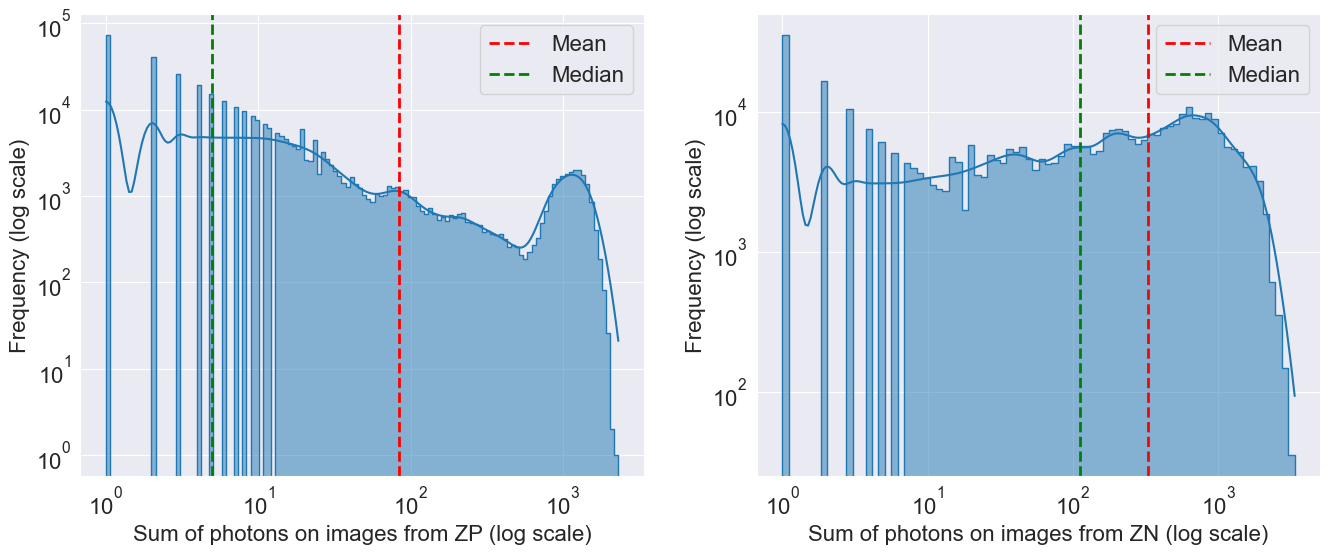

In [11]:
import matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(16, 6))
sns.histplot(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, kde=True, ax=ax1, log_scale=(True, True), element="step")
ax1.axvline(data_cond[data_cond.proton_photon_sum != 0].proton_photon_sum.mean(), color='red', linestyle='--', label='Mean', linewidth=2)
ax1.axvline(data_cond[data_cond.proton_photon_sum != 0].proton_photon_sum.median(), color='green', linestyle='--', label='Median', linewidth=2)

sns.histplot(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, kde=True, ax=ax2, log_scale=(True, True), element="step");
ax2.axvline(data_cond[data_cond.neutron_photon_sum != 0].neutron_photon_sum.mean(), color='red', linestyle='--', label='Mean', linewidth=2)
ax2.axvline(data_cond[data_cond.neutron_photon_sum != 0].neutron_photon_sum.median(), color='green', linestyle='--', label='Median', linewidth=2)

ax1.set(xlabel='Sum of photons on images from ZP (log scale)', ylabel='Frequency (log scale)')
ax2.set(xlabel='Sum of photons on images from ZN (log scale)', ylabel='Frequency (log scale)')

ax1.legend()
ax2.legend()
plt.rcParams.update({'font.size': 18})

fig.savefig("Thesis images/plot_distribution_photon_sum_log.png", bbox_inches="tight", dpi=300)

### See quartile values

In [16]:
# PROTON
# Calculate the quartiles
Q1 = np.percentile(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, 25)
Q2 = np.percentile(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, 50)
Q3 = np.percentile(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, 75)

# Output the quartile values
data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum.min(), Q1, Q2, Q3, data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum.max()

(1.0, 2.0, 5.0, 18.0, 2312.0)

In [17]:
# NEUTRON
# Calculate the quartiles
Q1 = np.percentile(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, 25)
Q2 = np.percentile(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, 50)
Q3 = np.percentile(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, 75)

# Output the quartile values
data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum.min(), Q1, Q2, Q3, data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum.max()

(1.0, 12.0, 111.0, 510.0, 3360.0)

In [21]:
sum(np.abs(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum) < 15) / float(len(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum))

0.7130709878336451

In [8]:
## Filter Photon Sum
def filter_photon_sum(data_p, data_n, data_conditional, min_photon_sum=10, max_photon_sum=None):
    """
    Returns particle data and responses of experiments with minimum sum of photons.
    """
    if max_photon_sum:
        mask = (data_conditional.proton_photon_sum >= min_photon_sum)\
               & (data_conditional.proton_photon_sum <= max_photon_sum)\
               & (data_conditional.neutron_photon_sum >= min_photon_sum)\
               & (data_conditional.neutron_photon_sum <= max_photon_sum)
    else:
        mask = (data_conditional.proton_photon_sum >= min_photon_sum) & (data_conditional.neutron_photon_sum >= min_photon_sum)
    return data_p[mask], data_n[mask], data_conditional[mask].reset_index(drop=True)


MIN_PHOTON_SUM = 18
MAX_PHOTON_SUM = None

data_p, data_n, data_cond = filter_photon_sum(data_p, data_n, data_cond, min_photon_sum=MIN_PHOTON_SUM, max_photon_sum=MAX_PHOTON_SUM)
print(data_p.shape, data_n.shape, data_cond.shape)
print("Min proton photon sum: ", data_cond.proton_photon_sum.min(),
      "Min neutron photon sum: ", data_cond.neutron_photon_sum.min())

# fig, ax = plt.subplots(1, 2)
# ax[0].imshow(data_p[3], interpolation='none')
# ax[1].imshow(data_n[3], interpolation='none')

(38348, 56, 30) (38348, 44, 44) (38348, 11)
Min proton photon sum:  18.0 Min neutron photon sum:  18.0


## Save filtered data

In [9]:
# calculate min max proton, neutron sum
photon_sum_proton_min, photon_sum_proton_max = int(data_cond.proton_photon_sum.min()), int(data_cond.proton_photon_sum.max())
photon_sum_neutron_min, photon_sum_neutron_max = int(data_cond.neutron_photon_sum.min()), int(data_cond.neutron_photon_sum.max())

In [10]:
photonsums_intervals_str = f"proton_{photon_sum_proton_min}_{photon_sum_proton_max}_neutron_{photon_sum_neutron_min}_{photon_sum_neutron_max}"
photonsums_intervals_str

'proton_18_1970_neutron_18_3249'

In [16]:
data_cond = data_cond.drop(columns=['neutron_photon_sum'])

In [18]:
# save conditional data
data_cond.to_pickle(f"../data/data_cond_photonsum_{photonsums_intervals_str}.pkl")

In [19]:
# save proton data
with open(f"../data/data_photonsum_{photonsums_intervals_str}.pkl", 'wb') as f:
    pickle.dump(data_p, f)

In [19]:
# save neutron data
with open(f"../data/data_neutron_photonsum_{photonsums_intervals_str}.pkl", 'wb') as f:
    pickle.dump(data_n, f)

## Add padding

Two sizes of images:
- 56 x 30
- 44 x 44

__Goal:__ Add padding to images to transform them to common size: 56 x 44

__Approaches:__
- add padding around the images (center the content)

In [11]:
from enum import Enum

class PaddingMethod(Enum):
    CENTER = 0
    LEFT_SIDE = 0

In [12]:
def add_padding_56_30(image, method: PaddingMethod = PaddingMethod.CENTER.name):
    """
    Transform image of shape(56, 30) into shape(56, 44).
    :param method: Method of adding padding
    :param image: Image of shape(56, 30)
    :returns: Image of shape(56, 44)
    """
    if method == PaddingMethod.CENTER.name:
        # Add 7 pixels to the left and right side of image
        return np.pad(image,
                      pad_width=((0, 0), (7, 7)),
                      mode='constant', constant_values=0)


def add_padding_44_44(image, method: PaddingMethod = PaddingMethod.CENTER.name):
    """
    Transform image of shape(44, 44) into shape(56, 44).
    :param method: Method of adding padding
    :param image: Image of shape(44, 44)
    :returns: Image of shape(56, 44)
    """
    if method == PaddingMethod.CENTER.name:
        # Add 7 pixels to the top and bottom side of image
        return np.pad(image,
                      pad_width=((6, 6), (0, 0)),
                      mode='constant', constant_values=0)

In [13]:
padded_p = np.array(list(map(add_padding_56_30, data_p)))
# del data_p

In [14]:
padded_n = np.array(list(map(add_padding_44_44, data_n)))
# del data_n

In [15]:
padded_p.shape, padded_n.shape

((38348, 56, 44), (38348, 56, 44))

## Combine images into two channels

Given the padded images, combine them into a single image with 2 channels

In [16]:
def combine_into_channels(data_1, data_2):
    data = np.zeros(shape=(len(data_1), 56, 44, 2))

    data[:, :, :, 0] = data_1
    data[:, :, :, 1] = data_2
    return data

data = combine_into_channels(padded_p, padded_n)
data.shape

(38348, 56, 44, 2)

### Image results

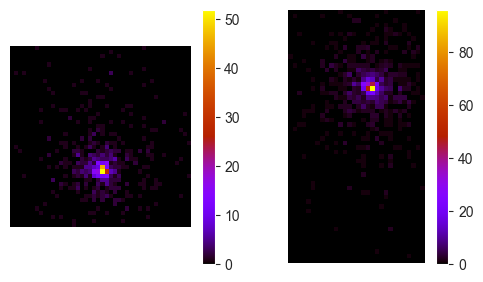

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3))

for i in range(0, 2):
    if i % 2:
        x = data_p[proton_example_ids]
    else:
        x = data_n[neutron_example_ids]
    im = ax[i % 2].imshow(x, cmap='gnuplot')
    ax[i % 2].axis('off')
    fig.colorbar(im, ax=ax[i % 2])

fig.tight_layout(rect=[0, 0, 1, 0.975])
# plt.savefig("Thesis images/examples_response_proton_neutron.png", dpi=300, format='png', bbox_inches='tight')

#### Plot padding

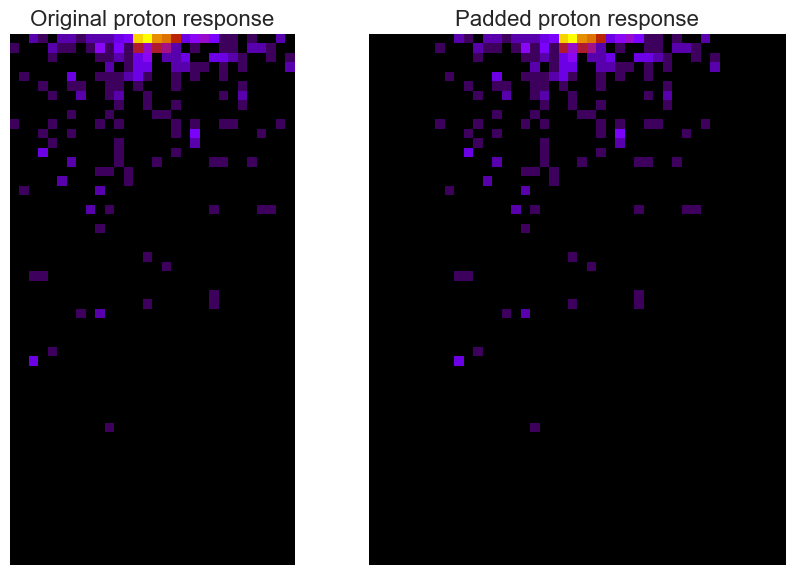

In [16]:
proton_example_ids = 16612 #16623
p_example = data_p[proton_example_ids]
padded_p_example = np.array(list(map(add_padding_56_30, [data_p[proton_example_ids]])))

fig, axs = plt.subplots(1, 2, figsize=(9, 6))

for i in range(0, 2):
    if i % 2:
        x = padded_p_example.reshape(56, 44)
        txt = 'Padded proton response'
    else:
        x = p_example.reshape(56, 30)
        txt = 'Original proton response'
    im = axs[i % 2].imshow(x, cmap='gnuplot')
    axs[i % 2].set_title(txt, fontsize=16)
    axs[i % 2].axis('off')
    # fig.colorbar(im, ax=axs[i % 2])

fig.tight_layout(rect=[0, 0, 1, 0.975])
plt.savefig("Thesis images/examples_response_proton_padding.png", dpi=300, format='png', bbox_inches='tight')

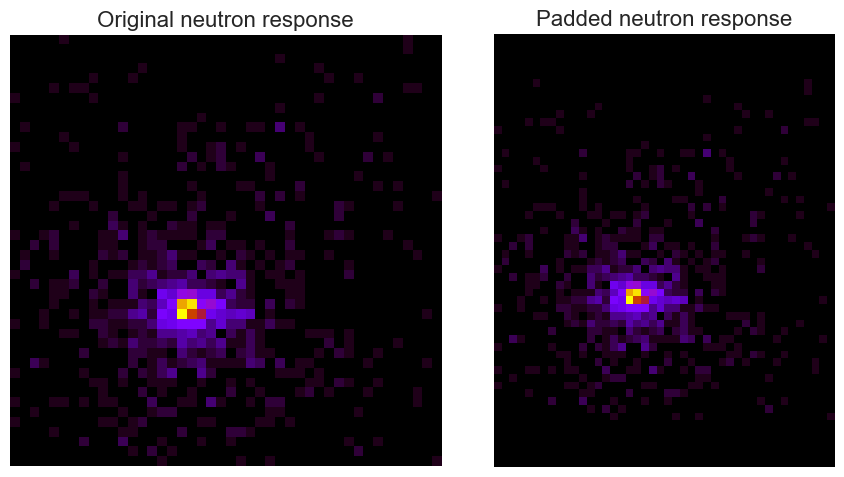

In [15]:
neutron_example_ids = 17613 # 17623 # 17628
n_example = data_n[neutron_example_ids]
padded_n_example = np.array(list(map(add_padding_44_44, [data_n[neutron_example_ids]])))
fig, axs = plt.subplots(1, 2, figsize=(9, 5))

for i in range(0, 2):
    if i % 2:
        x = padded_n_example.reshape(56, 44)
        txt = 'Padded neutron response'
    else:
        x = data_n[neutron_example_ids]
        txt = 'Original neutron response'
    # Set aspect to 'auto' to adjust the axes to fit the data.
    im = axs[i % 2].imshow(x, cmap='gnuplot')

    axs[i % 2].set_title(txt, fontsize=16)
    axs[i % 2].axis('off')
    # fig.colorbar(im, ax=axs[i % 2])

fig.tight_layout(rect=[0, 0, 1, 0.975])
plt.savefig("Thesis images/examples_response_neutron_padding.png", dpi=300, format='png', bbox_inches='tight')

C:\Users\PB\AppData\Local\Temp\ipykernel_26116\4146077759.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout() # rect=[0, 0, 1, 0.975]


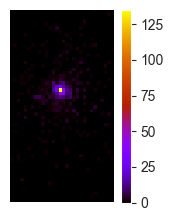

In [73]:
plt.figure(figsize=(2, 2.5))
im = plt.imshow(data_p[34], cmap='gnuplot')
plt.axis('off')
fig.colorbar(im)

fig.tight_layout() # rect=[0, 0, 1, 0.975]
plt.savefig("Thesis images/examples_response_proton.png", dpi=300, format='png',bbox_inches='tight')

### Proton images

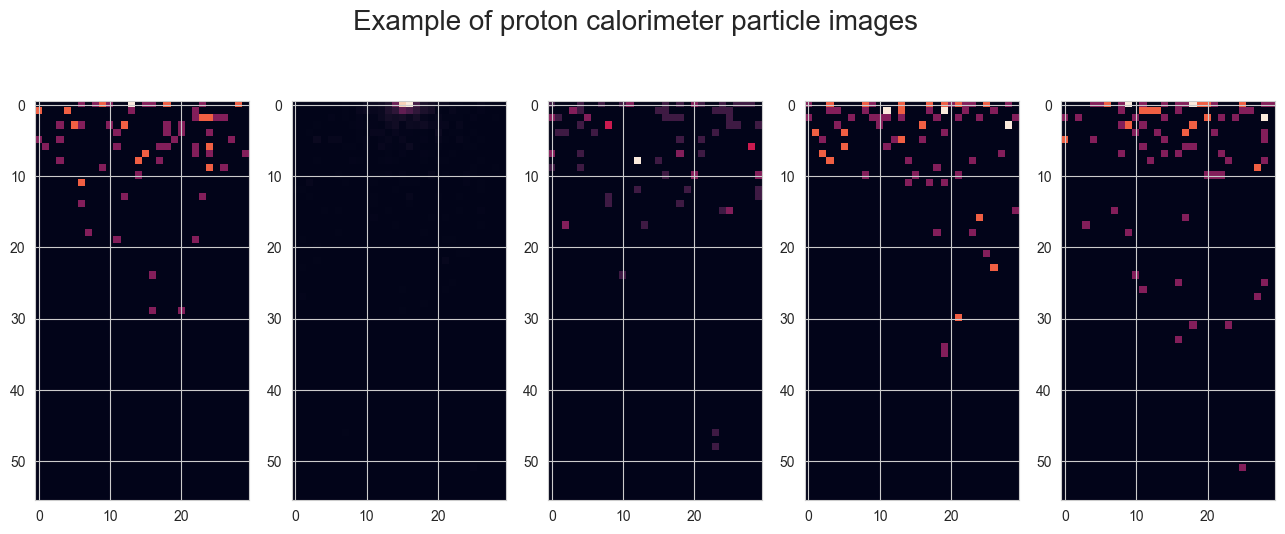

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(16, 6))
ax[0].imshow(data_p[2], interpolation='none')
ax[1].imshow(data_p[3], interpolation='none')
ax[2].imshow(data_p[4], interpolation='none')
ax[3].imshow(data_p[5], interpolation='none')
ax[4].imshow(data_p[6], interpolation='none')
fig.suptitle("Example of proton calorimeter particle images", fontsize=20)
fig.savefig("example_proton_images.png", bbox_inches="tight", dpi=300)

### Neutron images

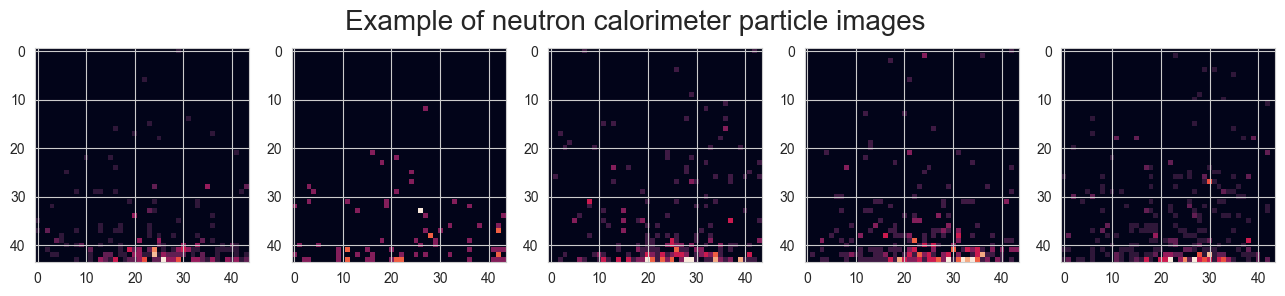

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
ax[0].imshow(data_n[2], interpolation='none')
ax[1].imshow(data_n[3], interpolation='none')
ax[2].imshow(data_n[4], interpolation='none')
ax[3].imshow(data_n[5], interpolation='none')
ax[4].imshow(data_n[6], interpolation='none')
fig.suptitle("Example of neutron calorimeter particle images", fontsize=20)
fig.savefig("example_neutron_images.png", bbox_inches="tight", dpi=300)

### Padded images

Text(0.5, 1.0, 'Neutron image with padding 56x44')

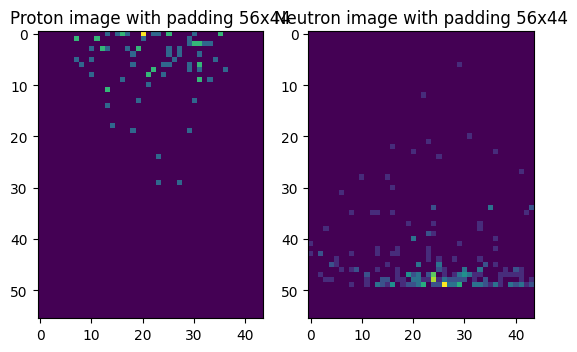

In [50]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(padded_p[2], interpolation='none'); ax[0].set_title("Proton image with padding 56x44")
ax[1].imshow(padded_n[2], interpolation='none'); ax[1].set_title("Neutron image with padding 56x44")

## Save files

In [17]:
data_cond.to_pickle(f"../data/data_cond_photonsum_{MIN_PHOTON_SUM}.pkl")

In [18]:
with open(f"../data/data_proton_neutron_photonsum_{photonsums_intervals_str}_padding.pkl", 'wb') as f:
    pickle.dump(data, f)